In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

from measurements import get_graph_measurements, print_graph_measurements
from graphs import load_dataset_to_graph, attach_real_attributes
from graph_to_dataframe import graph_to_dataframe, preprocess_dataframe

In [2]:
prepared_datasets_path = 'prepared_datasets'
prepared_dataset_names = [
    'primary_school', 'workplace', 
    'highschool_2011', 'highschool_2012', 'hospital', 
    'moreno_blogs', 'moreno_sheep', 'moreno_seventh',
    # big datasets
    'petster-hamster', 'email-Eu'
]

In [3]:
num_of_nodes = []
num_of_edges = []
num_of_attrs = []

for dataset_name in prepared_dataset_names:
    dataset_path = os.path.join(prepared_datasets_path, dataset_name)
    graph = load_dataset_to_graph(dataset_path)
    attach_real_attributes(graph, dataset_path)
    df = graph_to_dataframe(graph)
    
    num_of_nodes.append(graph.number_of_nodes())
    num_of_edges.append(graph.number_of_edges())
    num_of_attrs.append(len(df.drop(columns=['node_id']).columns))

tips = sns.load_dataset("tips")

Cutting nodes up to 600
Cutting nodes up to 600
Cutting nodes up to 600


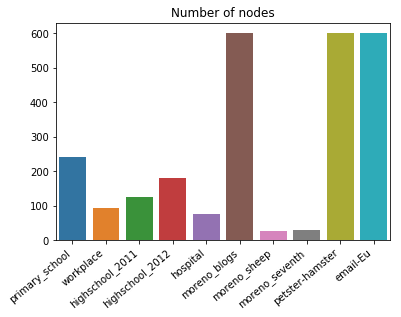

In [4]:
plot = sns.barplot(x=prepared_dataset_names, y=num_of_nodes)
plot.set_title('Number of nodes')
plot.set_xticklabels(plot.get_xticklabels(), rotation=40, ha="right")
plt.show()

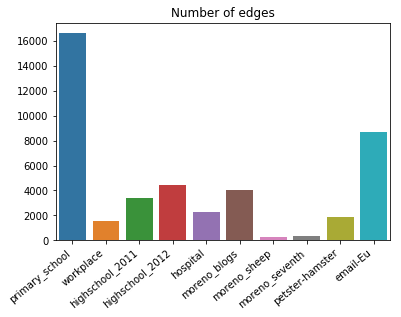

In [5]:
plot = sns.barplot(x=prepared_dataset_names, y=num_of_edges)
plot.set_title('Number of edges')
plot.set_xticklabels(plot.get_xticklabels(), rotation=40, ha="right")
plt.show()

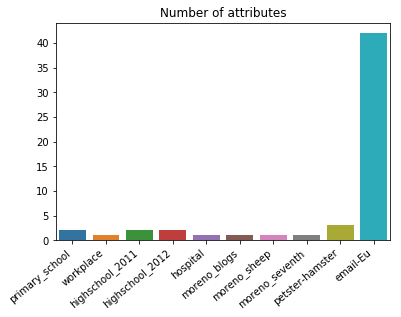

In [6]:
plot = sns.barplot(x=prepared_dataset_names, y=num_of_attrs)
plot.set_title('Number of attributes')
plot.set_xticklabels(plot.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [7]:
for dataset_name in prepared_dataset_names:
    print('Dataset:\n  {}'.format(dataset_name))
    dataset_path = os.path.join(prepared_datasets_path, dataset_name)
    
    graph = load_dataset_to_graph(dataset_path)
    
    print('Number of nodes: {}'.format(graph.number_of_nodes()))
    print('Number of edges: {}'.format(graph.number_of_edges()))
    print()
    
    attach_real_attributes(graph, dataset_path)
    
    df = graph_to_dataframe(graph)
    
    # df = preprocess_dataframe(df, graph.number_of_nodes())
    print('Columns')
    print(df.dtypes)
    print()
    
    measurements = get_graph_measurements(graph)
    print_graph_measurements(measurements)
    print()

Dataset:
  primary_school
Number of nodes: 242
Number of edges: 16634

Columns
class      object
gender     object
node_id     int64
dtype: object

Graph measurements:
  average_shortest_path_length: 1.7324508761702273
  diameter: 3
  degree_centralization: 138.54385964912277
  closeness_centralization: 120.04585413560703
  betweenness_centralization: 186.34807421440635
  pagerank_centralization: 138.4745797625161
  density: 0.28520969788416034
  degree_assortativity: 0.11827144611913469
  reciprocity: 1.0
  transitivity: 0.4797898838442378


Dataset:
  workplace
Number of nodes: 92
Number of edges: 1510

Columns
department    object
node_id        int64
dtype: object

Graph measurements:
  average_shortest_path_length: 1.964405160057334
  diameter: 3
  degree_centralization: 63.44999999999994
  closeness_centralization: 52.91375261789259
  betweenness_centralization: 81.09175910687728
  pagerank_centralization: 63.607402435880715
  density: 0.18036311514572384
  degree_assortativity: 